In [1]:
import matplotlib.pyplot as plt
from utils import Metric
import numpy as np
import os
import data
import sys

sys.argv = ["notebook", "--datadir", "/media/EXTHDD/arash/data/solar_flare", "--logdir", "log",
           "--modelreport",
"search_model.csv",
"--configreport",
"search_config.csv",
"--splitreport",
"search_split.csv",
"--resultfilename",
"searching",
"--resultdir",
"experiments_plot5"]
import utils

args = utils.arg_parse()

In [2]:
data.data_columns(args)

Index(['Timestamp', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH',
       'SAVNCPP', 'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45',
       'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY',
       'MEANJZD', 'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'CRVAL1',
       'CRLN_OBS', 'CRLT_OBS', 'CRVAL2', 'HC_ANGLE', 'SPEI', 'LAT_MIN',
       'LON_MIN', 'LAT_MAX', 'LON_MAX', 'QUALITY', 'BFLARE', 'BFLARE_LABEL',
       'CFLARE', 'CFLARE_LABEL', 'MFLARE', 'MFLARE_LABEL', 'XFLARE',
       'XFLARE_LABEL', 'BFLARE_LOC', 'BFLARE_LABEL_LOC', 'CFLARE_LOC',
       'CFLARE_LABEL_LOC', 'MFLARE_LOC', 'MFLARE_LABEL_LOC', 'XFLARE_LOC',
       'XFLARE_LABEL_LOC', 'XR_MAX', 'XR_QUAL', 'IS_TMFI'],
      dtype='object')

In [3]:
saliency = np.load("saliency.npy")
saliency = saliency / np.max(saliency)

In [4]:
words = data.data_columns(args)[1:25]

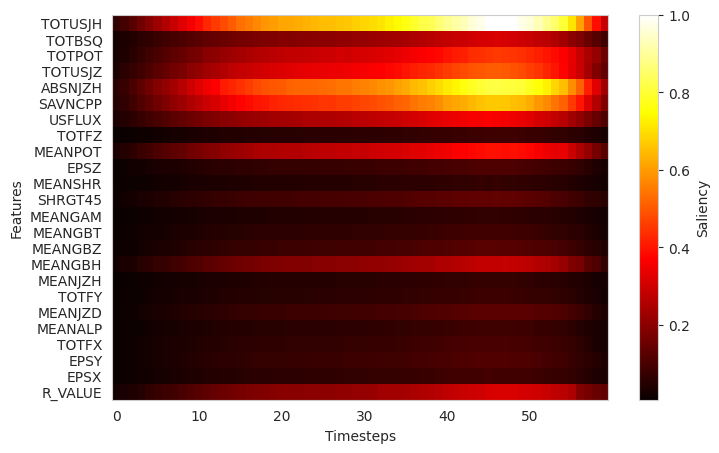

In [5]:
plt.figure(figsize=(8, 5))
plt.imshow(saliency, aspect='auto', cmap='hot')
plt.colorbar(label='Saliency')
plt.xlabel('Timesteps')
plt.ylabel('Features')
# plt.title('Saliency Map')
plt.yticks(np.arange(len(words)), words)
# saliency = np.sum(saliency, axis=1)
# plt.savefig(os.path.join(args.log_dir, "saliency_map.eps"))
plt.grid(False)
plt.show()

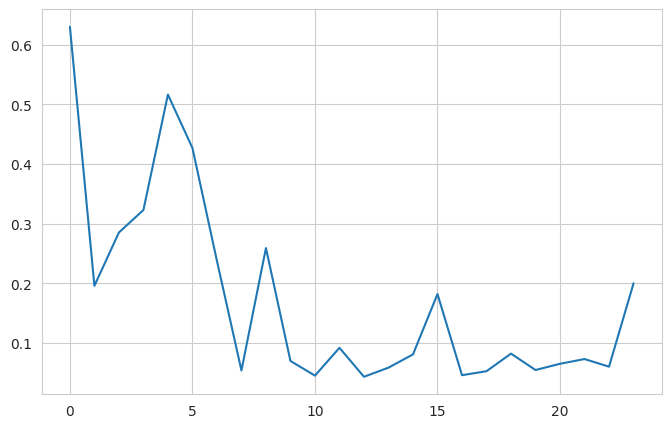

In [6]:
saliency_agg = np.mean(saliency, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(saliency_agg)
plt.show()

In [7]:
ordering = sorted(range(len(words)), key=lambda i: words[i])

In [8]:
words_sorted = [words[i] for i in ordering]
saliency_sorted = [saliency[i] for i in ordering]

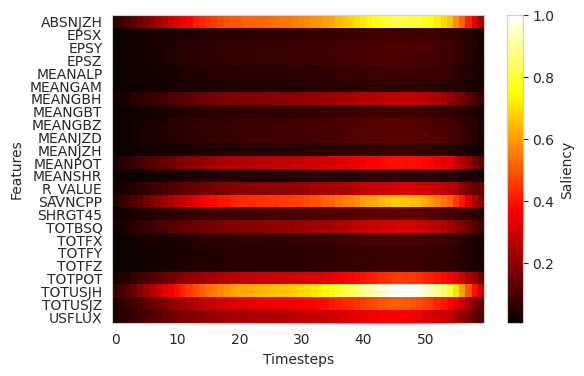

In [32]:
plt.figure(figsize=(6, 4))
im = plt.imshow(saliency_sorted, aspect='auto', cmap='hot')
plt.colorbar(im, label='Saliency')
plt.xlabel('Timesteps')
plt.ylabel('Features')
# plt.title('Saliency Map')
plt.yticks(np.arange(len(words_sorted)), words_sorted)
# saliency = np.sum(saliency, axis=1)
plt.grid(False)
plt.savefig(os.path.join(args.log_dir, "saliency_map.eps"), dpi=50, bbox_inches='tight')
plt.show()

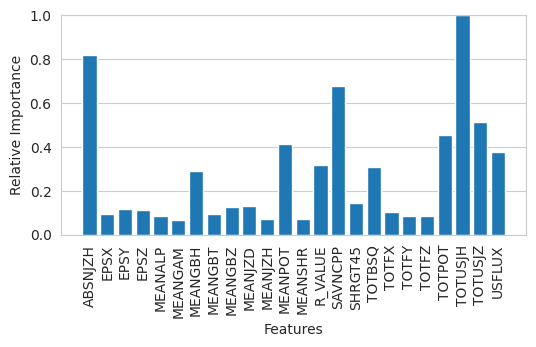

In [20]:
saliency_sorted_agg = np.sum(saliency_sorted, axis=1)

# Normalize to [0, 1]
saliency_sorted_agg = saliency_sorted_agg / np.max(saliency_sorted_agg)

plt.figure(figsize=(6, 2.85))
plt.xticks(np.arange(len(words_sorted)), words_sorted, rotation=90)

plt.yticks(np.linspace(0, 1, 6))  # Optional: adjust the number of ticks
plt.ylim(0, 1)  # Ensure y-axis is [0, 1]
plt.xlabel("Features")
plt.ylabel("Relative Importance")

# plt.yticks([])
plt.bar(list(range(24)), saliency_sorted_agg)
# plt.title("Aggregated saliency")
plt.grid(axis='x')
plt.savefig(os.path.join(args.log_dir, "saliency_agg.eps"), dpi=50, bbox_inches='tight')
plt.show()

In [11]:
largest = sorted(range(len(words)), key=lambda i: saliency_agg[i],  reverse=True)

In [61]:
words[largest[0]], words[largest[1]], words[largest[2]]

('TOTUSJH', 'ABSNJZH', 'SAVNCPP')